In [16]:
import numpy as np
import pandas as pd
from pandas import DataFrame 
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
!pip install plotly
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 15, 7

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
print("....Data Loading...."); print();

stock = '^GSPC'
stock_name = 'SP500 INDEX'

print(f'\033[4m{stock_name} - ({stock}) Price\033[0m');

data = web.DataReader(stock, data_source = 'yahoo', start = '2000-01-01')

data.rename(columns={'Close': 'price'}, inplace=True)
df = data.resample('M').last()
df = DataFrame(df.price.copy())
df

....Data Loading....

SP500 INDEX - (^GSPC) Price


,price
Date,
2000-01-31,1394.459961
2000-02-29,1366.420044
2000-03-31,1498.579956
2000-04-30,1452.430054
2000-05-31,1420.599976
...,...
2020-08-31,3500.310059
2020-09-30,3363.000000
2020-10-31,3269.959961


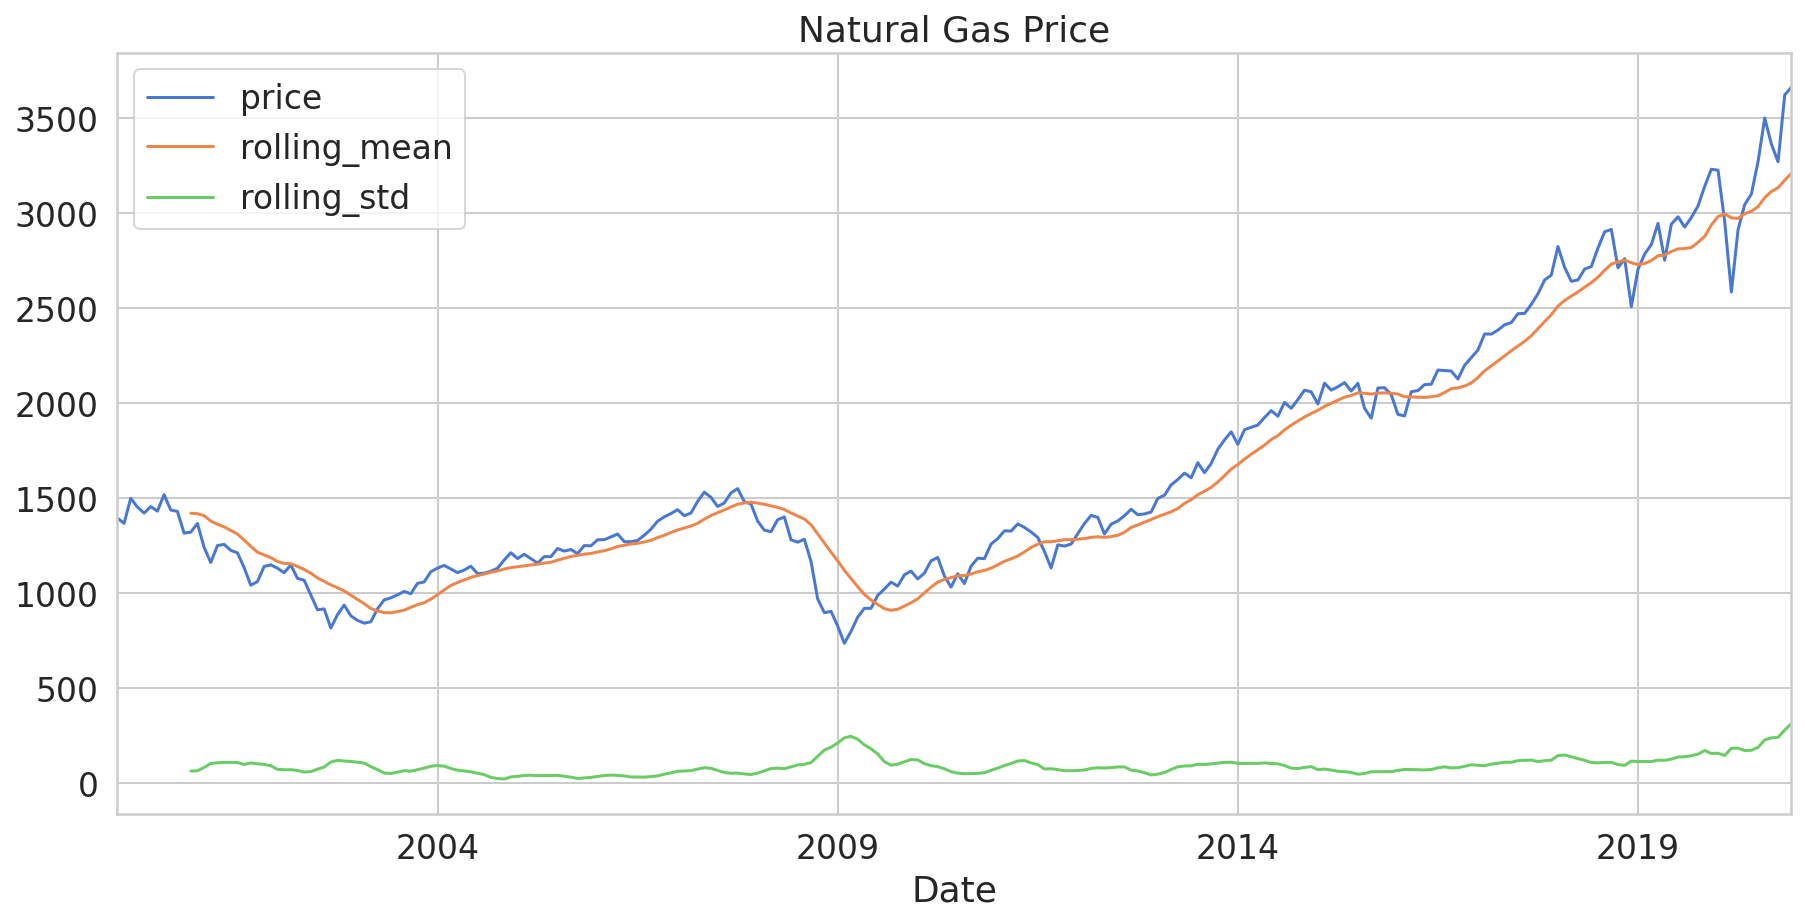

In [17]:
window = 12
df['rolling_mean'] = df.price.rolling(window=window).mean()
df['rolling_std'] = df.price.rolling(window=window).std()
df.plot(title='Natural Gas Price')
plt.show();

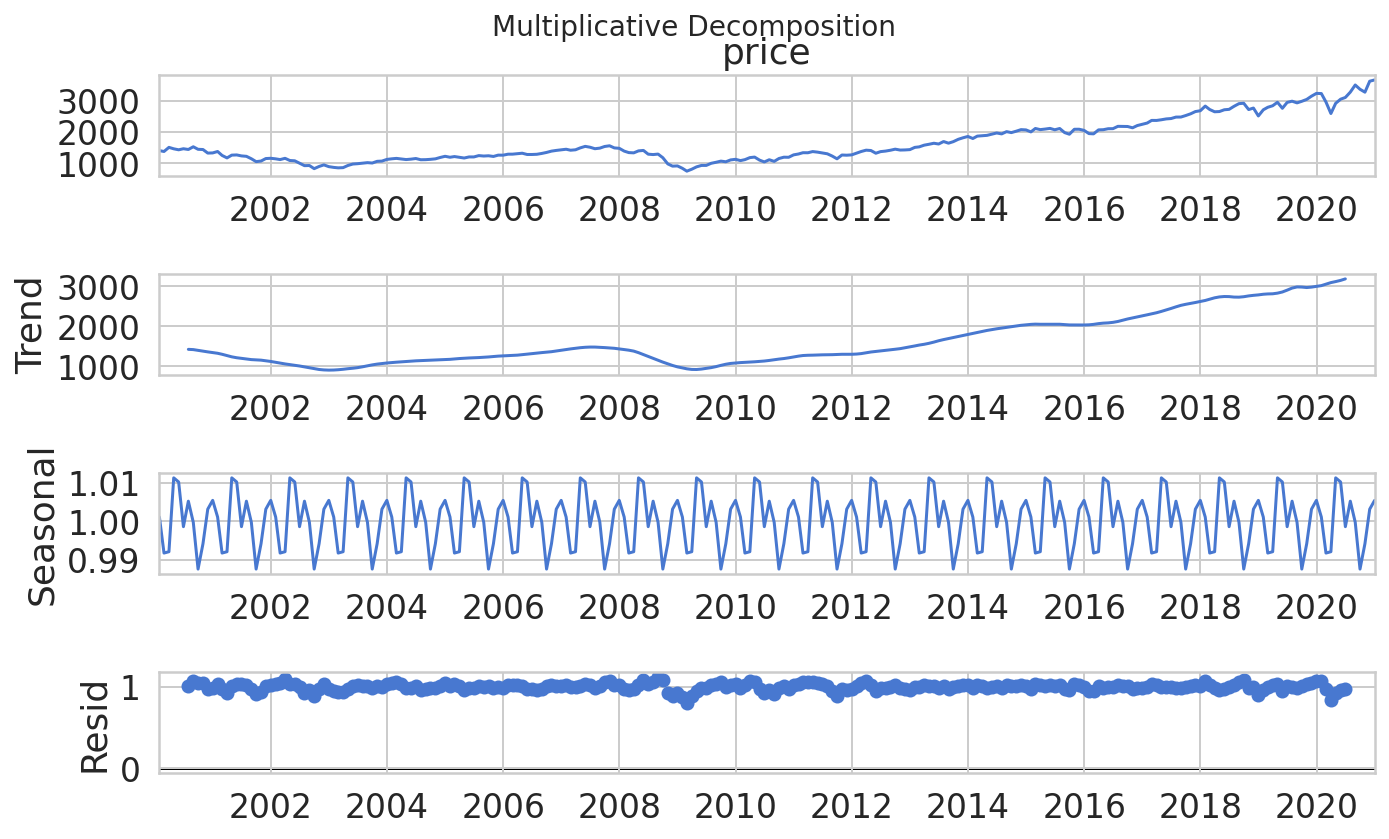

In [18]:
decomp = seasonal_decompose(df.price, model='multiplicative')
rcParams['figure.figsize'] = 10, 6
decomp.plot().suptitle('Multiplicative Decomposition', fontsize=14);

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [20]:
print('Results Dickey-Fuller Test:')
test = adfuller(df.price, autolag = 'AIC')
output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value','# of Lags Used', '# of Observations Used'])
for key, value in test[4].items():
    output[f'Critical Value ({key})'] = value

print(output)

Results Dickey-Fuller Test:
Test Statistic              1.785752
p-value                     0.998320
# of Lags Used              7.000000
# of Observations Used    244.000000
Critical Value (1%)        -3.457438
Critical Value (5%)        -2.873459
Critical Value (10%)       -2.573122
dtype: float64


In [25]:
def kpss_test(x, h0_type='c'):
  indices = ['Test Statistic', 'p-value', 'N_LAGS']
  kpss_test = kpss(x, regression=h0_type)
  results = pd.Series(kpss_test[0:3], index=indices)
  for key, value in kpss_test[3].items():
    results[f'Critical Value ({key})'] = value
  return results

kpss_test(df.price)

/home/gordon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            1.244134
p-value                   0.010000
N_LAGS                   16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

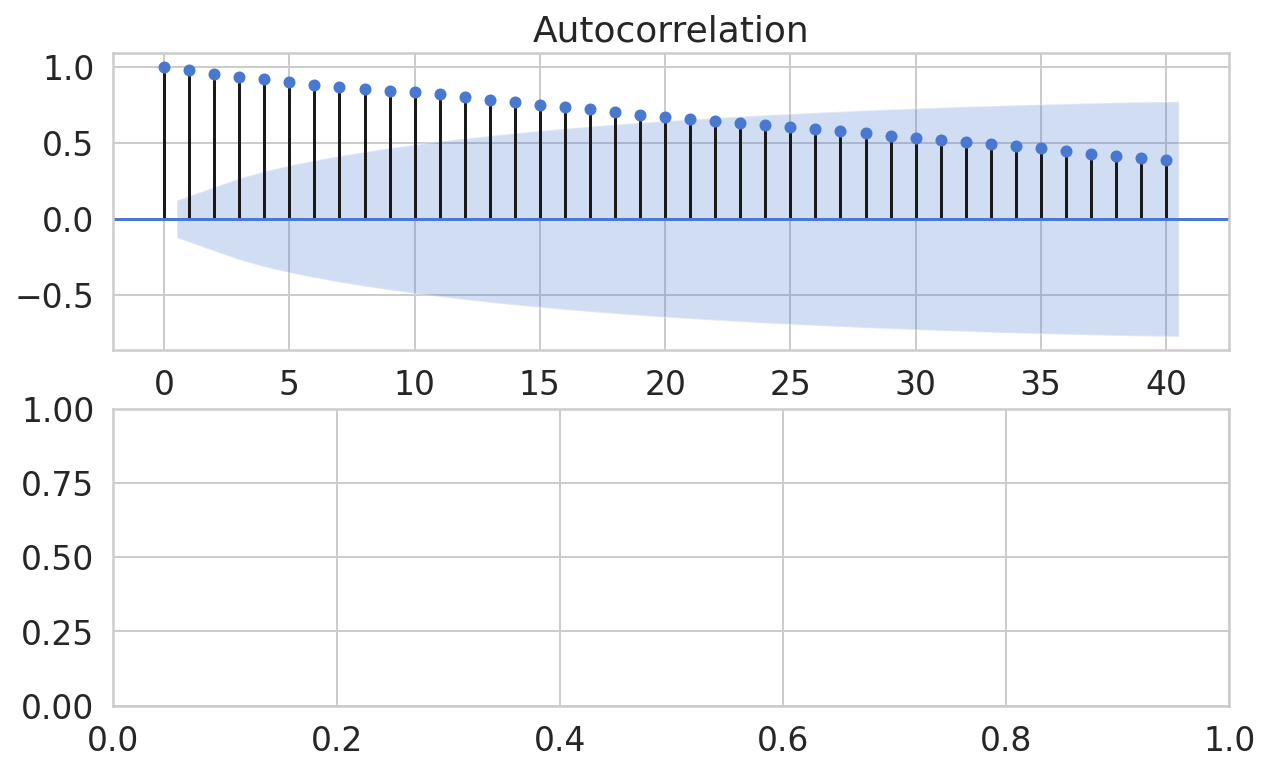

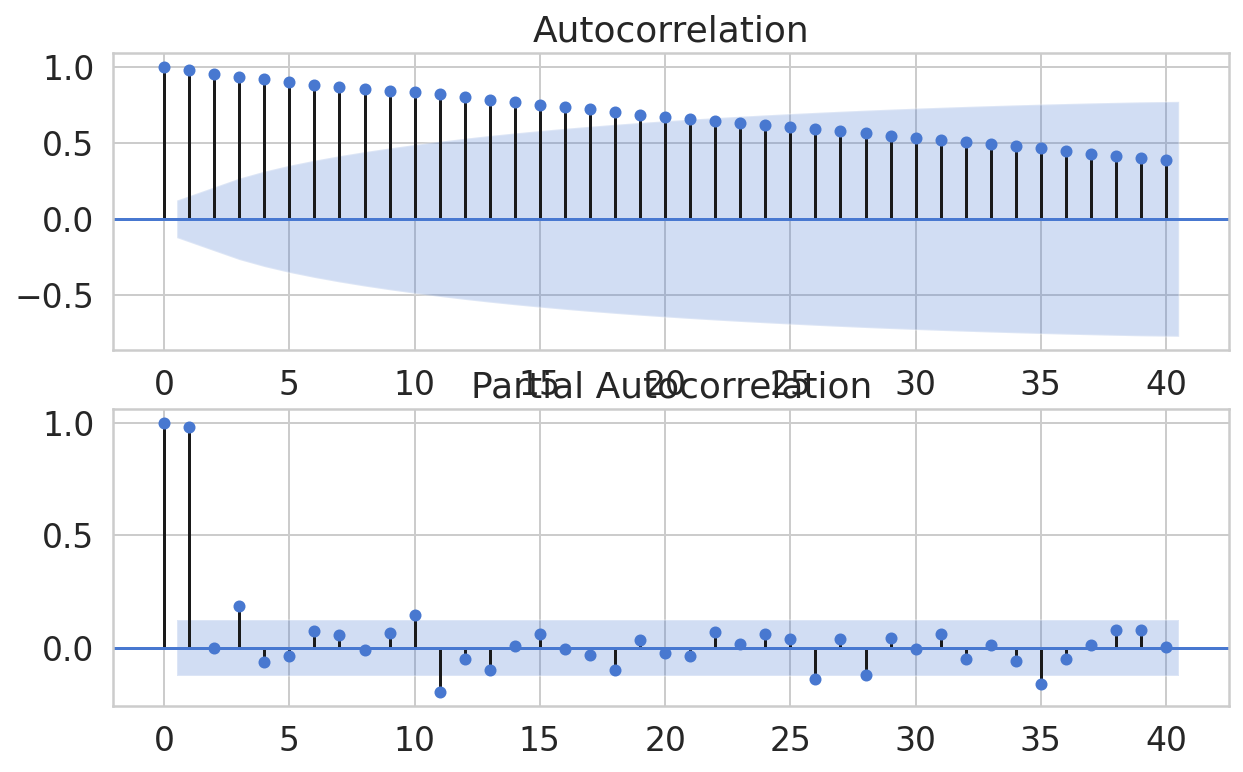

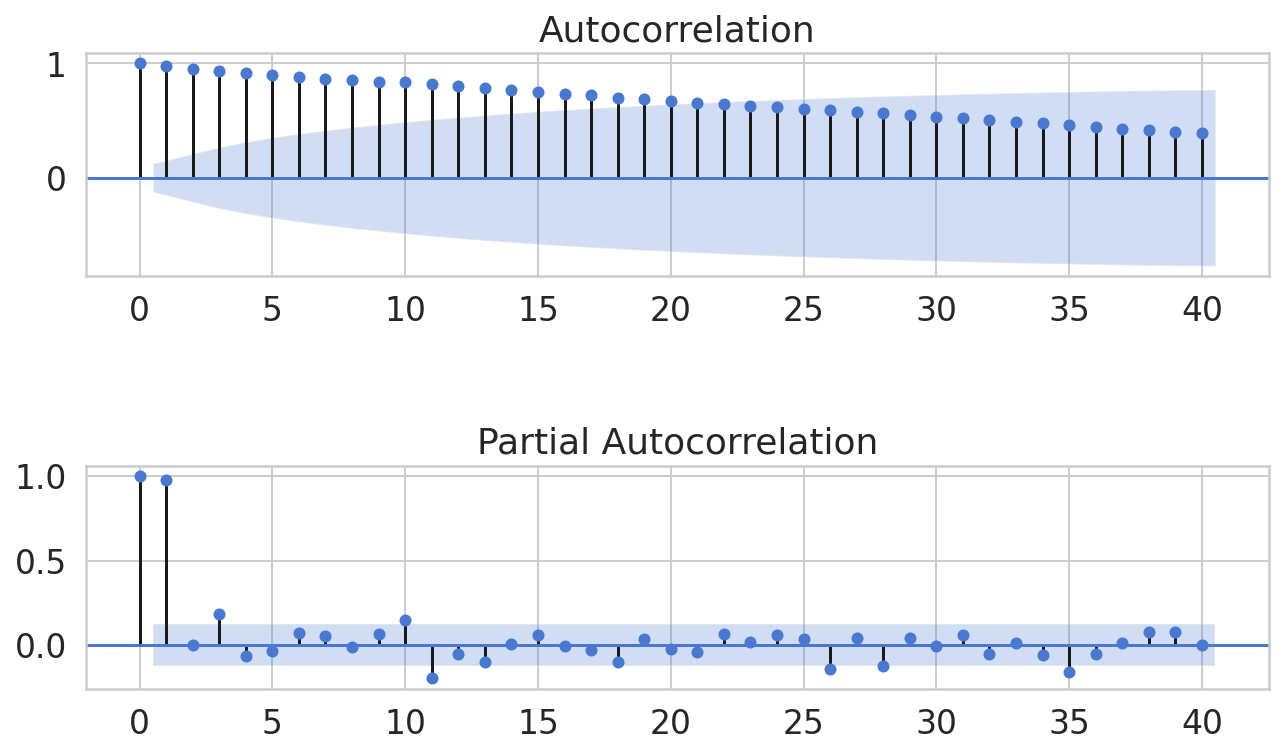

In [29]:
lags = 40
sig_level = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(df.price, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.price, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plt.tight_layout()

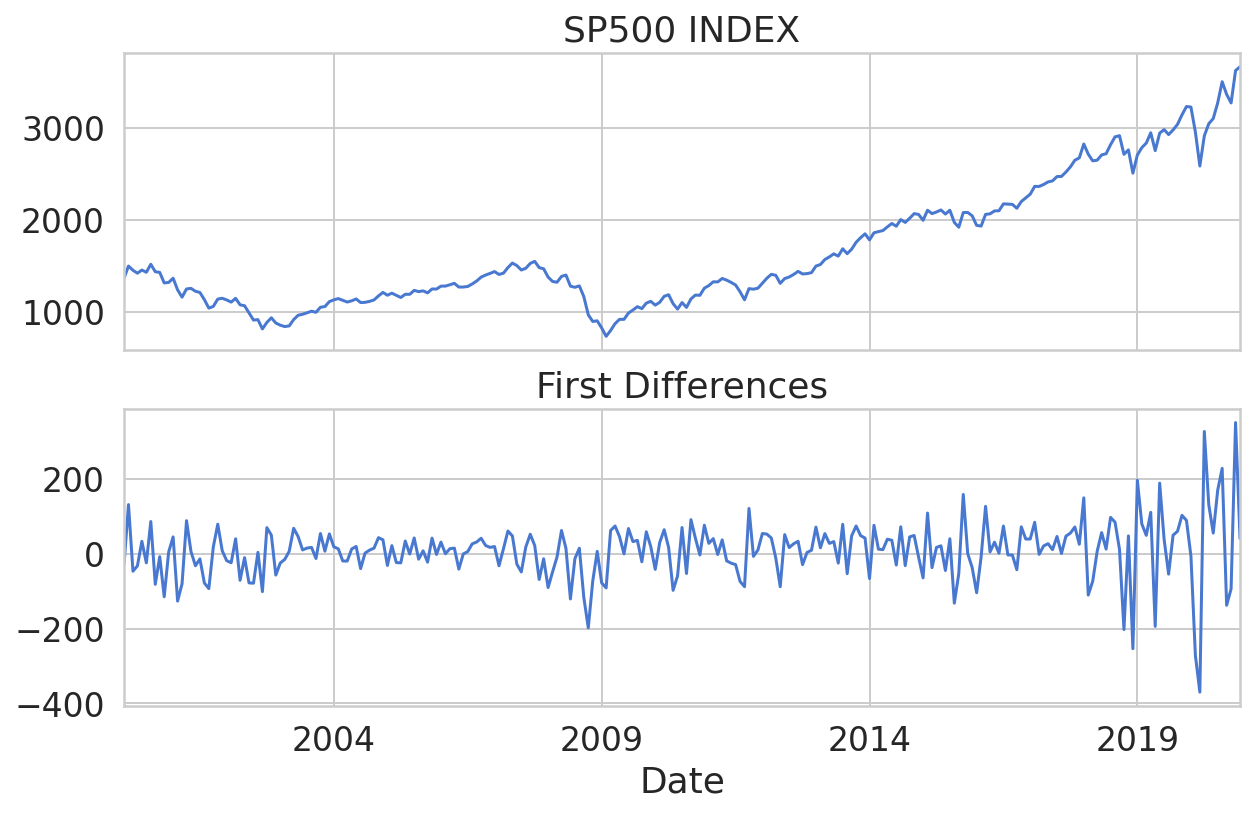

In [32]:
price_diff = df.price.diff().dropna()
fig, ax = plt.subplots(2, sharex=True)
df.price.plot(title = f"{stock_name}", ax=ax[0])
price_diff.plot(ax=ax[1], title='First Differences');

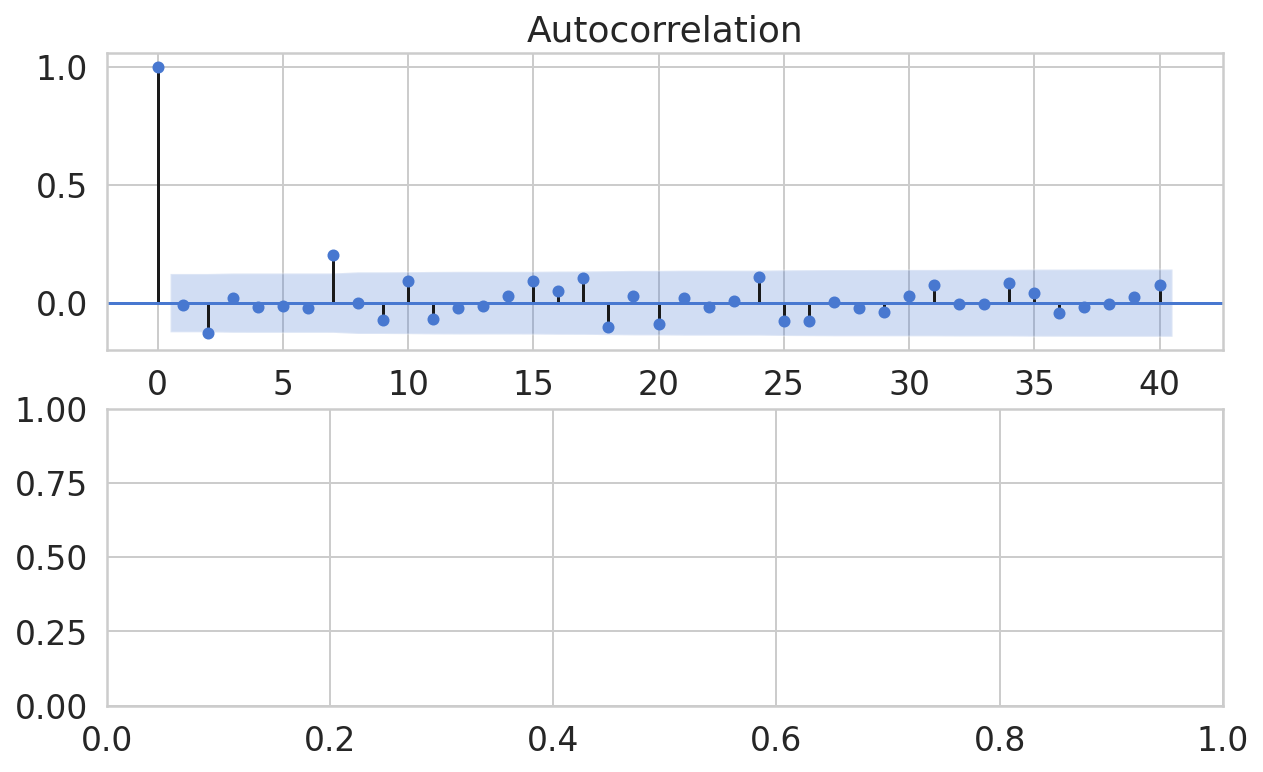

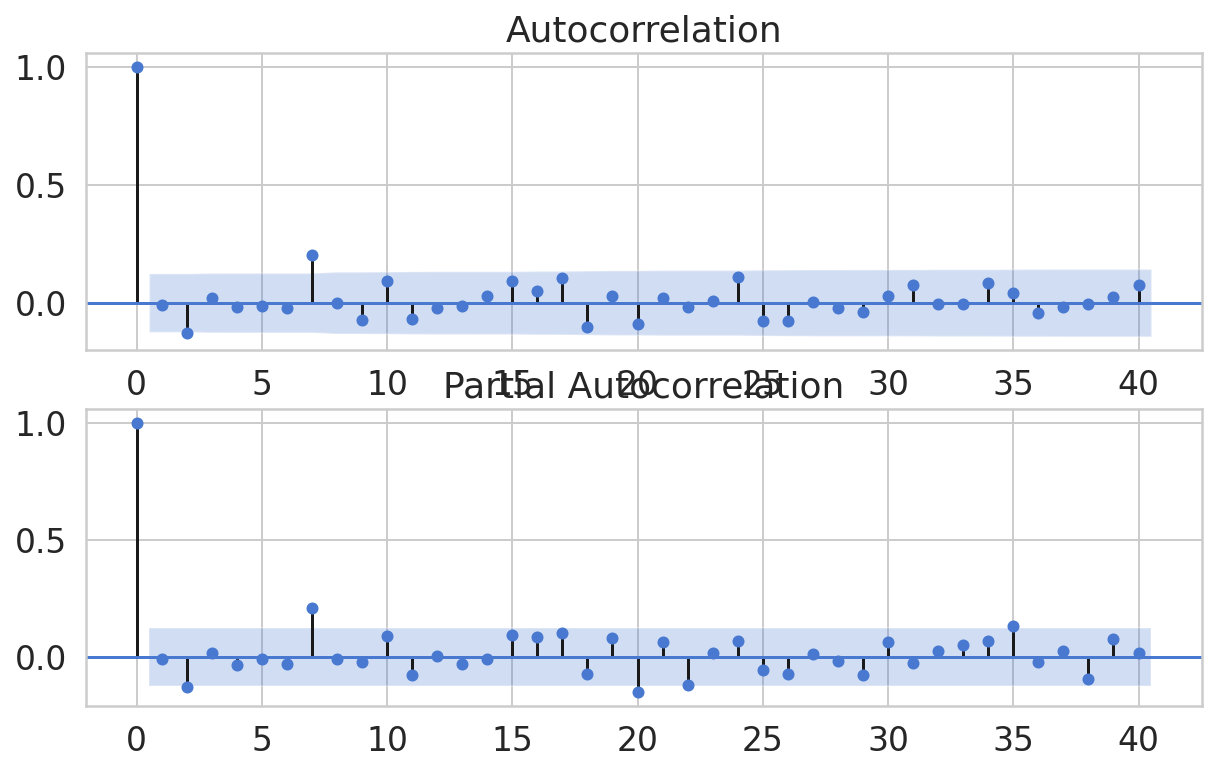

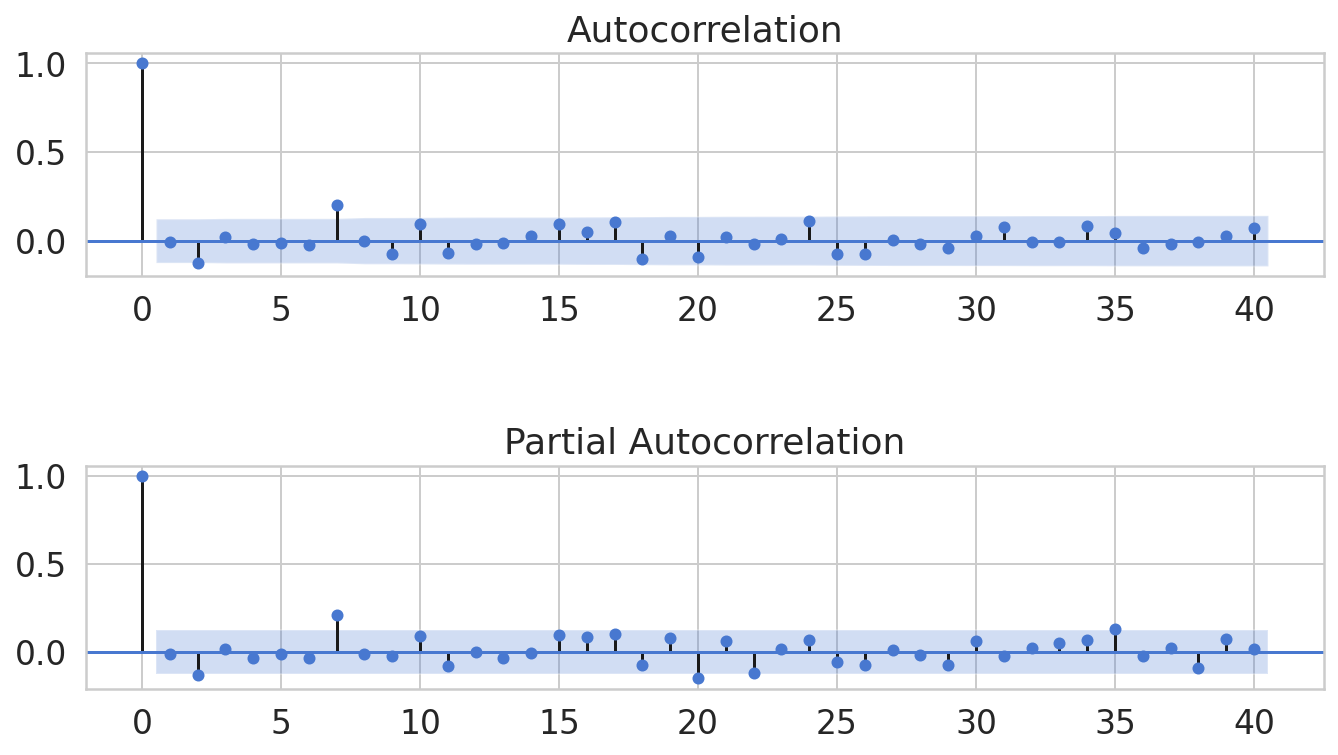

In [33]:
fig, ax = plt.subplots(2, 1)
plot_acf(price_diff, ax=ax[0], lags=lags, alpha=sig_level)
plot_pacf(price_diff, ax=ax[1], lags=N_LAGS, alpha=sig_level)
plt.tight_layout()

In [35]:
print(adfuller(price_diff).dropna()); print(); print(kpss_test(price_diff).dropna());

AttributeError: 'tuple' object has no attribute 'dropna'